<a href="https://colab.research.google.com/github/DarmianNong/PortfolioProjects/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import thư viện

In [1]:
import numpy as np
import pandas as pd
import io

from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import discriminant_analysis

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

from sklearn import discriminant_analysis

1. Explore Datasets

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
np.array(df.isnull().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

No missing data in the datasets

In [7]:
dfFraud = df[df.Class==1]
dfNorm = df[df.Class==0]
ratio = float(len(dfFraud))/len(dfNorm)
print(ratio)

0.0017304750013189597


The dataset is highly unbalanced, the positive class (Fraud transactions) account for 0.172% of all transactions

2. Selecting features

In [9]:
y_target = df.Class
X_data = df.drop(['Class'], axis=1)

Optimal number of features : 11


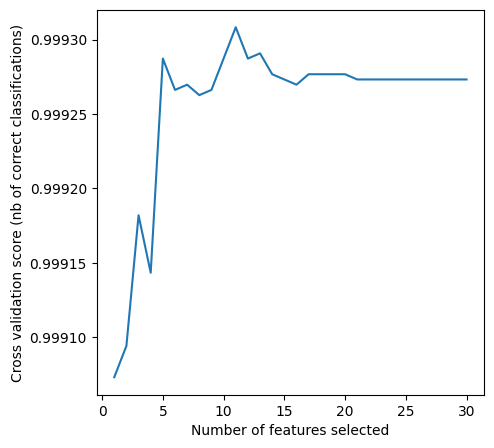

In [10]:
# Create the RFE object and compute a cross-validated score.
lda = discriminant_analysis.LinearDiscriminantAnalysis()#SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lda, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X_data, y_target)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
# Access the cross-validation results using cv_results_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [11]:
rfecv.cv_results_

{'mean_test_score': array([0.99907306, 0.99909412, 0.9991819 , 0.99914328, 0.99928724,
        0.99926617, 0.99926968, 0.99926266, 0.99926617, 0.99928724,
        0.9993083 , 0.99928724, 0.99929075, 0.9992767 , 0.99927319,
        0.99926968, 0.9992767 , 0.9992767 , 0.9992767 , 0.9992767 ,
        0.99927319, 0.99927319, 0.99927319, 0.99927319, 0.99927319,
        0.99927319, 0.99927319, 0.99927319, 0.99927319, 0.99927319]),
 'std_test_score': array([1.98376243e-04, 1.72652166e-04, 1.89469860e-04, 1.70786387e-04,
        6.95200546e-05, 9.89404621e-05, 8.26455443e-05, 9.91892451e-05,
        9.89404621e-05, 7.80420888e-05, 5.85448783e-05, 8.17458391e-05,
        7.75668670e-05, 9.47393929e-05, 9.91895632e-05, 1.03686545e-04,
        9.47393929e-05, 9.47393929e-05, 9.47393929e-05, 9.47393929e-05,
        9.06156195e-05, 9.06156195e-05, 9.06156195e-05, 9.06156195e-05,
        9.06156195e-05, 9.06156195e-05, 9.06156195e-05, 9.06156195e-05,
        9.06156195e-05, 9.06156195e-05]),
 'split

In [12]:
rfecv.support_

array([False, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
rfecv.ranking_

array([20,  5,  3,  1,  1,  2,  8,  1, 11,  1,  1,  1,  1, 16,  1, 15,  1,
        1,  1,  7, 10,  4, 18, 17, 12, 14, 13,  6,  9, 19])

In [14]:
X_data.columns.values[rfecv.support_]

array(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'], dtype=object)

3. Prepare training and testing datasets

Split the data into Normal and Fraud datasets

Shuffle the data before taking sample to make sure the data from each class is randomly selected

Eliminate the features/predictors that have low/none support to the classification

In [15]:
#Shuffle the dataframes so that the training is done in a random order.
dfNorm = shuffle(dfNorm)
dfFraud = shuffle(dfFraud)

# Set X_train equal to 80% of the fraudulent transactions.
X_train = dfFraud.sample(frac=0.8)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, dfNorm.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

y_train = X_train['Class']
y_test = X_test['Class']

# Ensure rfecv is refitted on the current training data before applying feature selection
rfecv.fit(X_train, y_train)  # Assuming rfecv is an instance of RFECV

X_train = X_train.iloc[:, rfecv.support_]
X_test = X_test.iloc[:, rfecv.support_]

In [16]:
X_data.shape, X_train.shape, X_test.shape

((284807, 30), (227846, 13), (56961, 13))

In [17]:
X_train.columns.values

array(['V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V27'], dtype=object)

4. Resampling data

4.1/ Transforming Training Dataset The ratio 0.17% between the Fraud and Normal classes is showing an strongly unbalanced data in favor to the Normal class. Resampling is used to transform the Training dataset, in which we will under-resampling the Normal class, and make the Dataset balanced out between the Classes, this prevents fitting model from overfitting on the majority class.

Centroid Clustering technique is used to transform the Training dataset. Perform under-sampling by generating centroids based on clustering methods. Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

In [18]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
X_train_ = X_resampled
y_train_ = y_resampled
X_test_ = X_test
y_test_ = y_test

Verifying the number of features from the original Training Dataset and the transfomred Training Dataset.

In [20]:
X_train.shape, X_train_.shape, y_train.shape, y_train_.shape

((227846, 13), (788, 13), (227846,), (788,))

Verifying the balancing between the Normal and Fraud classes.

In [21]:
sum(y_train_==1), sum(y_train_==0)

(394, 394)

4.2/ Examing the original Training dataset and its under-resamplingversion after the transforming process.

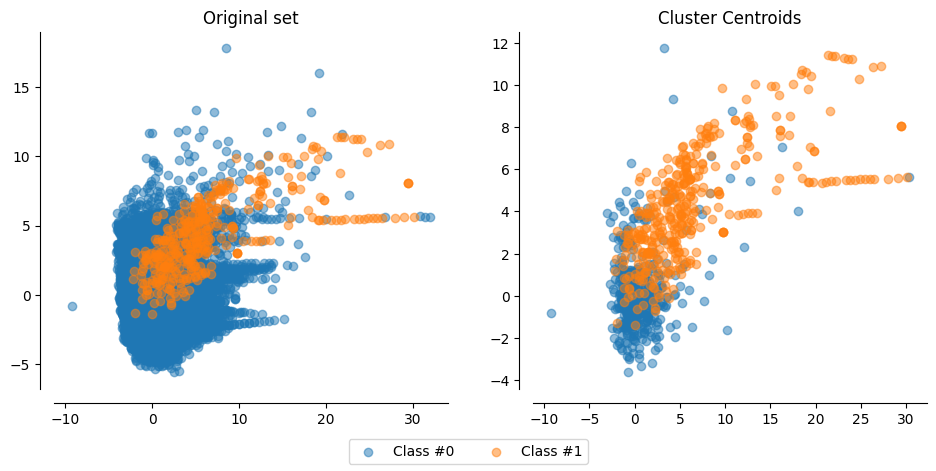

In [22]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)

# Apply SMOTE + ENN
#sm = SMOTEENN(ratio = 'minority')
#X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
plt.rcParams['figure.figsize'] = 10, 5
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y_train == 0, 0], X_vis[y_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y_train == 1, 0], X_vis[y_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
#ax2.set_title('SMOTE + ENN')
ax2.set_title('Cluster Centroids')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-6, 8])
    #ax.set_ylim([-6, 6])

f.legend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

5. Fitting model

5.1. QDA model

5.1.1. Fitting QDA model

In [23]:
QDA_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train_, y_train_)

QuadraticDiscriminantAnalysis()

In [24]:
QDA_model.score(X_train_, y_train_)

0.8984771573604061

In [25]:
class_names = ["Normal", "Fraud"]


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[370  24]
 [ 56 338]]
Normalized confusion matrix
[[0.94 0.06]
 [0.14 0.86]]


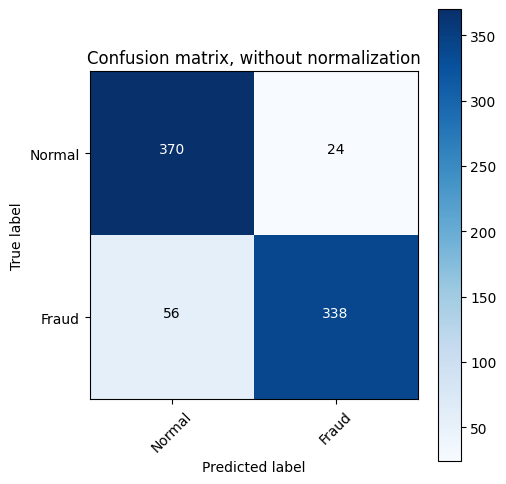

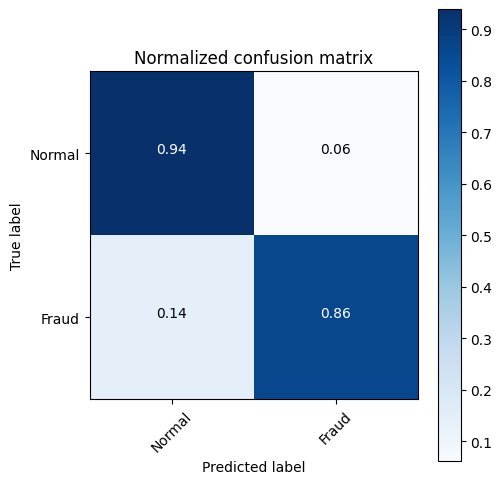

In [26]:
def plotConfusion(model, X, y):
    y_true, y_pred = y, model.predict(X)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

plotConfusion(QDA_model, X_train_, y_train_)

In [27]:
QDA_model.score(X_test_, y_test_)

0.9777742666034656

Confusion matrix, without normalization
[[55609  1254]
 [   12    86]]
Normalized confusion matrix
[[0.98 0.02]
 [0.12 0.88]]


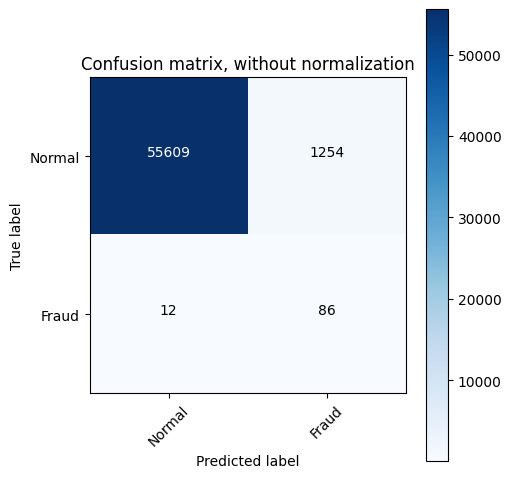

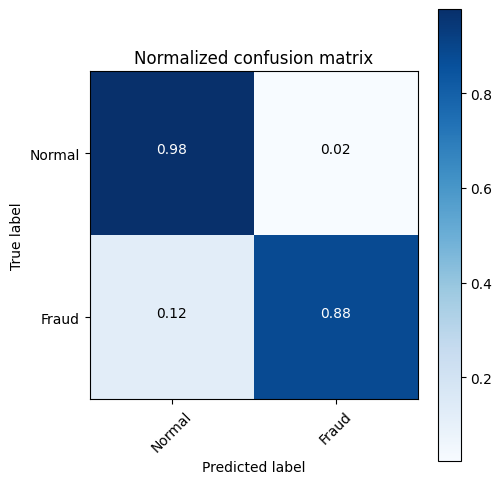

In [28]:
plotConfusion(QDA_model, X_test_, y_test_)

5.1.2. how the QDA Classification works on the Test Dataset:

In [29]:
def plotModel(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    # Check if colormap is already registered using .name
    # Get the names of registered colormaps as a list
    registered_cmaps = plt.colormaps() # Get a list of registered colormap names
    if 'red_blue_classes' not in registered_cmaps: # Check in the list of registered colormap names
        colDict = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
                   'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
                   'blue': [(0, 1, 0.5), (1, 1, 1)]}
        cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
        plt.cm.register_cmap(cmap=cmap)

    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    plt.scatter(x, y, c = label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

labels = X_train.columns.values

def pairPlot(model, i, j):
    model.fit(X_test_.iloc[:,[i,j]], y_test_)
    plotModel(model, X_test_.iloc[:, i], X_test_.iloc[:, j], y_test_)
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])

<ipython-input-29-8abe048b98a7>:21: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feat

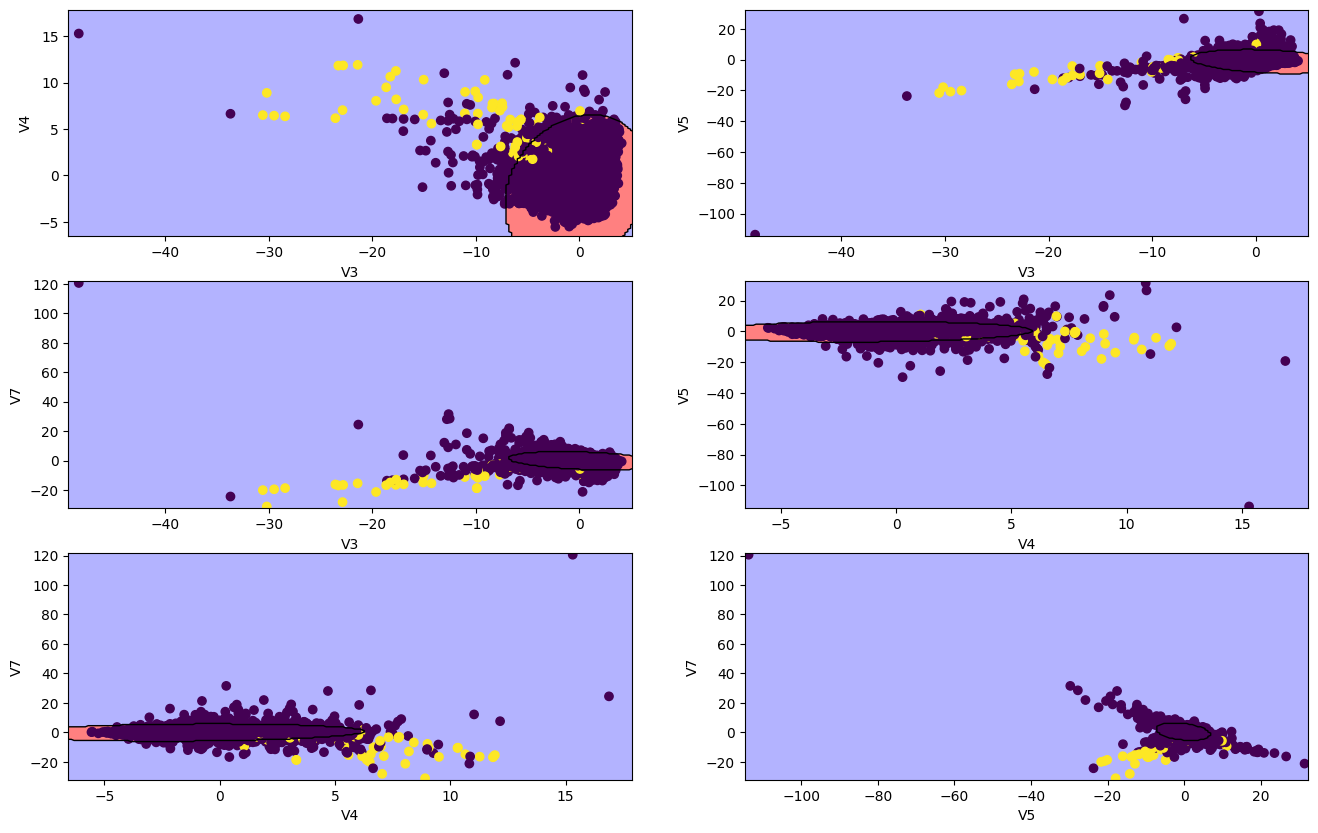

In [30]:
#QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()
plt.rcParams['figure.figsize'] = 16, 10
plt.subplot(321)
pairPlot(QDA_model, 0, 1)

plt.subplot(322)
pairPlot(QDA_model, 0, 2)

plt.subplot(323)
pairPlot(QDA_model, 0, 3)

plt.subplot(324)
pairPlot(QDA_model, 1, 2)

plt.subplot(325)
pairPlot(QDA_model, 1, 3)

plt.subplot(326)
pairPlot(QDA_model, 2, 3)

5.2. Logistic Regression Model

5.2.1. Fitting Logistic Regression Model

In [31]:
!pip install scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

In [32]:
clf.fit(X_train_, y_train_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [33]:
clf.best_params_

{'C': 1}

5.2.2. Examine the Logistic Regression Model

Classification on the training data

Confusion matrix, without normalization
[[382  12]
 [ 47 347]]
Normalized confusion matrix
[[0.97 0.03]
 [0.12 0.88]]


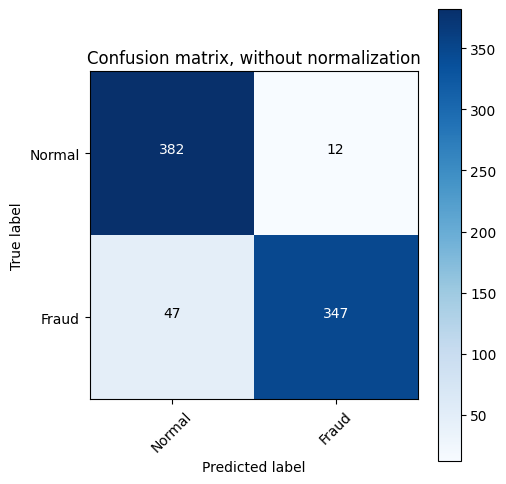

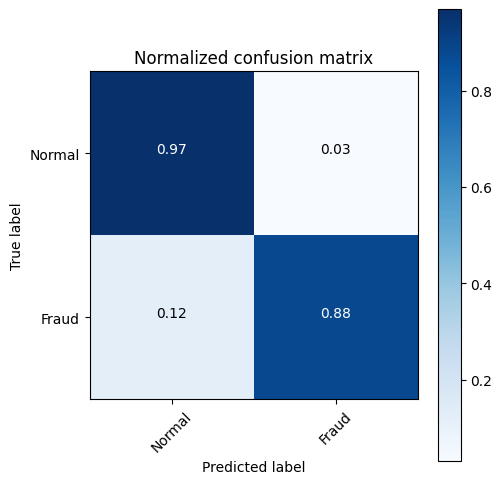

In [34]:
plotConfusion(clf, X_train_, y_train_)

Classification on test data

Confusion matrix, without normalization
[[56279   584]
 [   14    84]]
Normalized confusion matrix
[[0.99 0.01]
 [0.14 0.86]]


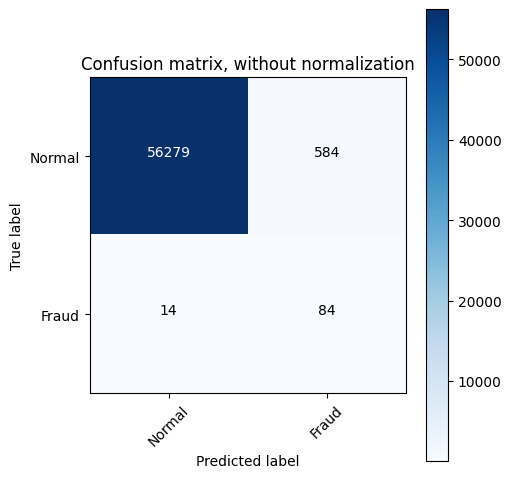

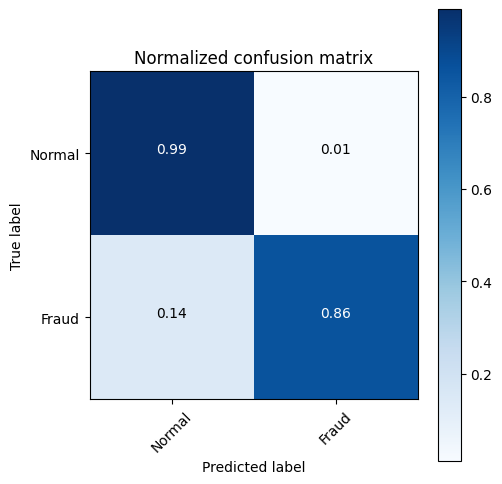

In [35]:
plotConfusion(clf, X_test_, y_test_)

5.2.3. Selecting probabitiy threshold for the Logistic Regression Model Classification:

This classification scoring is going to be examined further in order to find the opitmal point where the model can achieve not only high score in dectecting Fraud (Recall Score), but also high score in correctly classifying Normal transactions (Precision Score) due to the following aspects:

High Fraud classification (Recall score) rate will obviously help business/bank from losing money

High Normal classification (Precision score) rate will help improve the Customer Experience/Satisfactory

Probability Threshold: 0.10
Recall metric: 0.96
Precision metric: 0.59
Probability Threshold: 0.20
Recall metric: 0.92
Precision metric: 0.87
Probability Threshold: 0.30
Recall metric: 0.91
Precision metric: 0.95
Probability Threshold: 0.40
Recall metric: 0.89
Precision metric: 0.98
Probability Threshold: 0.50
Recall metric: 0.86
Precision metric: 0.99
Probability Threshold: 0.60
Recall metric: 0.85
Precision metric: 0.99
Probability Threshold: 0.70
Recall metric: 0.84
Precision metric: 1.00
Probability Threshold: 0.80
Recall metric: 0.83
Precision metric: 1.00
Probability Threshold: 0.90
Recall metric: 0.79
Precision metric: 1.00


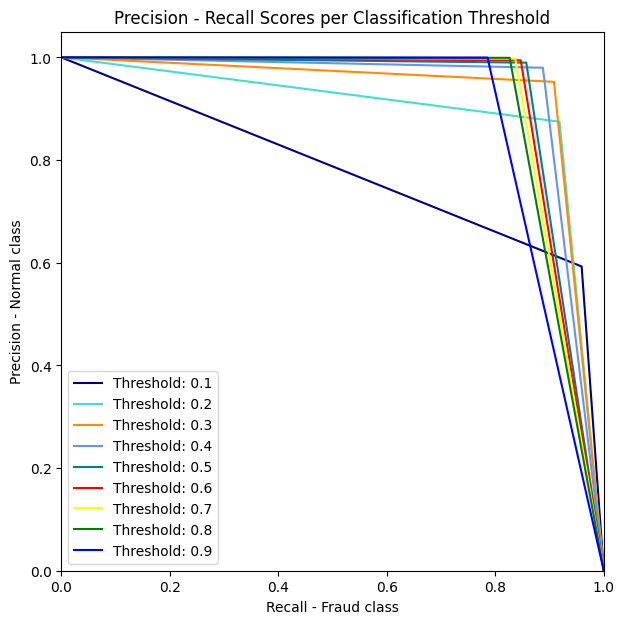

In [36]:
y_pred_test_proba = clf.predict_proba(X_test_)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

prec, rec = [],[]
for i in thresholds:
    y_test_predictions_high_recall = y_pred_test_proba[:,1] > i

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    p = float(cnf_matrix[0,0])/(cnf_matrix[0,1]+cnf_matrix[0,0])
    r = float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])
    rec.append(r)
    prec.append(p)

    print("Probability Threshold: {0:0.2f}".format(i))
    print("Recall metric: {0:0.2f}".format(r))
    print("Precision metric: {0:0.2f}".format(p))

plt.figure(figsize=(7,7))

for i,color,r,p in zip(thresholds,colors,rec,prec):
    plt.plot([0, r, 1], [1, p, 0],color=color, label='Threshold: %s'%i)
    plt.ylabel('Precision - Normal class')
    plt.xlabel('Recall - Fraud class')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision - Recall Scores per Classification Threshold')
    plt.legend(loc="lower left")

6.1. SVM Model

6.1.1. Fitting model

In [37]:
tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-3,  1e-4], 'C': [1,10,100,1000]}]
scores = ['precision', 'recall']

In [38]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    svm.fit(X_train_, y_train_)

    print("Best parameters set found on Training dataset:")
    print()
    print(svm.best_params_)
    print()
    print("Grid scores on Training dataset:")
    print()
    means = svm.cv_results_['mean_test_score']
    stds = svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true_test_svm, y_pred_test_svm = y_test_, svm.predict(X_test_)
    print(classification_report(y_true_test_svm, y_pred_test_svm))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on Training dataset:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on Training dataset:

0.925 (+/-0.040) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.822 (+/-0.020) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.908 (+/-0.031) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.758 (+/-0.019) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.925 (+/-0.032) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.852 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.924 (+/-0.041) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.767 (+/-0.035) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.928 (+/-0.040) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.897 (+/-0.027) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.923 (+/-0.030) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.781 (+/-0.031) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.936 (+/-0.038) for {'C': 1000, 'gamma': 0.001, 'k

Confusion matrix, without normalization
[[56399   464]
 [   11    87]]
Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


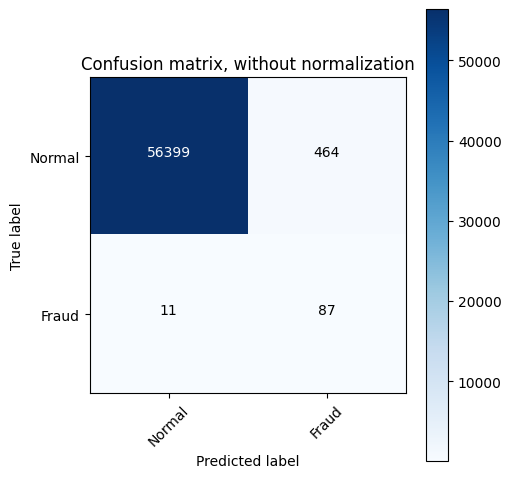

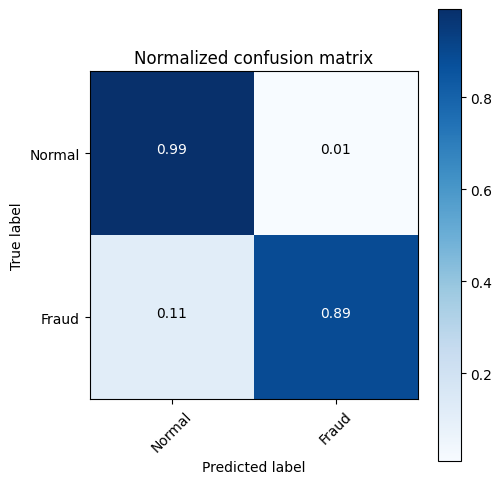

In [39]:
plotConfusion(svm, X_test_, y_test_)